In [33]:
includet("Systems/Pöschl-Teller/ExactPöschlTeller.jl")
includet("Systems/Pöschl-Teller/DMPöschlTeller.jl")
includet("Systems/Pöschl-Teller/ClassicalPöschlTeller.jl")
includet("Systems/Pöschl-Teller/SemiClassicalPöschlTeller.jl")

using .ExactPöschlTeller,.SemiClassicalPöschlTeller,.DMPöschlTeller,.ClassicalPöschlTeller
using BenchmarkTools, LoopVectorization

In [12]:
using Plots
default(fontfamily="Computer Modern",
        linewidth=2, framestyle=:box, grid=true, minorticks=5)
scalefontsizes(1.3)

In [30]:
function plot_relative_error!(error,grid)
    Threads.@threads for n in eachindex(grid)
        error[n] = min( prevfloat(Inf), 
        abs( 1-dm_pt.U(grid[n][1],grid[n][2])/ex_pt.U(grid[n][1],grid[n][2]) )  )
    end
    heatmap(τs,χs,error,clims=(0,0.1),dpi = 400)
end


function plot_functions(τs,functions,p;label=nothing)
    plots = plot(τs,vmap(τ->functions[1](τ,p),τs), ylims=(0,7),dpi=400,label=label[1])
    
    for n in 2:length(functions)
        plot!(τs,vmap(τ->functions[n](τ,p),τs),label=label[n])
    end

    plots
end

#Parameters
N = 100
τs = LinRange(10^-3,5,N)
χs = LinRange(10^-3,0.05,N)
χ = 0.025;

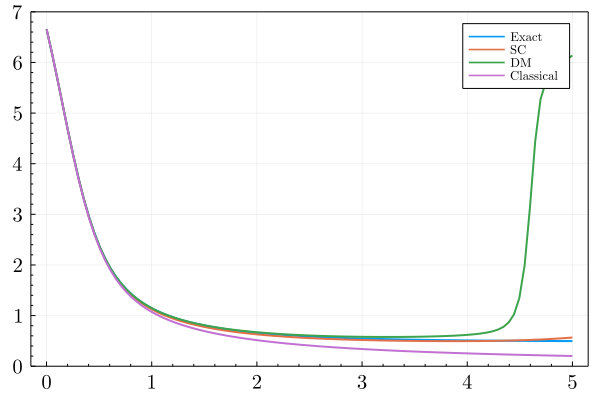

In [32]:
plot_functions(τs,[ex_pt.U,sc_pt.U,dm_pt.U,cl_pt.U],χ,label=["Exact" "SC" "DM" "Classical"])

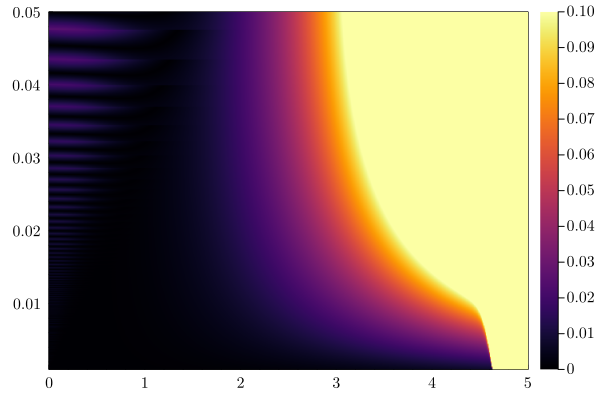

In [24]:
points = [ (τ,χ) for χ in χs, τ in τs ]
errors = zeros(size(points));
plot_relative_error!(errors, points)